**THE** tutorial: https://searchengineland.com/learn-how-to-chart-and-track-google-trends-in-data-studio-using-python-329119

**THE** notebook (I copied everything from here): https://github.com/hulyacobans/google-trends-to-sheets/blob/master/pytrends-to-sheets.ipynb

---------------------

**- All functions:**        https://github.com/GeneralMills/pytrends

**- All topics:** https://github.com/GeneralMills/pytrends

**- Suggested keywords**

**- Related quereis** (useful for Google Ads)

**- Tracking lots of keywords**

- Connecting Jupyter Notebook to Google Spreadsheets with gspread library

- Importing data into Google Data Studio

- Tracking rising keywords
-----------------------
Other cool info to check out:

- https://medium.com/@yanweiliu/getting-the-google-trends-data-with-python-67b335e7d1cf

- https://github.com/GeneralMills/pytrends/blob/master/examples/example.py

- basic tutorial for bigquery with python https://blog.morizyun.com/python/library-bigquery-google-cloud.html#Insert-rows

- https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f

  

In [1]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14261 sha256=7e30c33c744563ce5fe1cb7e0c73af0140f523fd228c44274ba0e3a69f6a7ae5
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [0]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
import datetime
from datetime import datetime, date, time

- Write your keywords, decide date range, location and many other things like choosing Youtube or Shopping channel to analyze. In the code below, ‘’today 12-m’’ means one year data. You can narrow your results by specifying location with ‘’geo’.’ 

In [0]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['tea', 'coffee', 'coke', 'milk', 'water'], timeframe='today 12-m', geo = 'GB')

- Let’s say you have a Youtube channel and you only want to see Youtube search trends. Then your code will be like this:

In [4]:
pytrend.build_payload(kw_list=['tea', 'coffee', 'coke', 'milk', 'water'], timeframe='today 12-m', geo = 'GB', gprop= youtube)

NameError: ignored

- if you want to check the "food&drink" topic

In [0]:
pytrend.build_payload(kw_list=['tea', 'coffee', 'coke', 'milk', 'water'], timeframe='today 12-m', geo = 'GB', cat = 71)

In [0]:
# (By the way, be careful that you cannot write directly more than 5 keywords in here. It will give an error because you can compare only 5 keywords on
#  Google Trends. I will use another code to analyze keywords more than 5.)

In [8]:
#to get interest over time score, you'll need pytrend.interest_over_time() function.
#For more functions, check this: https://github.com/GeneralMills/pytrends
interest_over_time_df = pytrend.interest_over_time() 
print(interest_over_time_df.head())

            tea  coffee  coke  milk  water isPartial
date                                                
2019-03-24   85      67     8    37     34     False
2019-03-31   72      60     8    36     33     False
2019-04-07   71      63     8    38     33     False
2019-04-14   68      62     8    35     34     False
2019-04-21   64      57     9    35     35     False


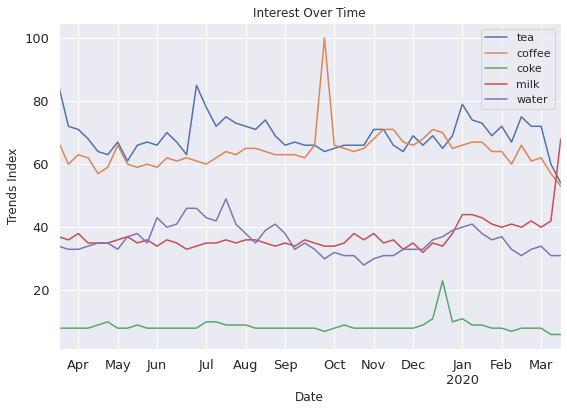

In [9]:
# Let's draw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

In [10]:
# Suggested keywords
#  If you use the suggestion function, it will return with suggested keywords and their ‘’types.’’

print(pytrend.suggestions(keyword='search engine land'), '\n')
print(pytrend.suggestions(keyword='amazon'), '\n')
print(pytrend.suggestions(keyword='cats'), '\n')
print(pytrend.suggestions(keyword='macbook pro'), '\n')
print(pytrend.suggestions(keyword='beer'), '\n')
print(pytrend.suggestions(keyword='ikea'), '\n')

[{'mid': '/m/0j1rt7p', 'title': 'Search Engine Land', 'type': 'Blog'}] 

[{'mid': '/m/0mgkg', 'title': 'Amazon.com', 'type': 'E-commerce company'}, {'mid': '/g/11b6x7cx6n', 'title': 'Amazon Prime', 'type': 'Topic'}, {'mid': '/m/0gvlgh', 'title': 'Amazon Prime Video', 'type': 'Television channel'}, {'mid': '/m/0cx4p', 'title': 'Amazon Rainforest', 'type': 'Rainforest in Brazil'}, {'mid': '/m/0sd7', 'title': 'Amazon River', 'type': 'River in South America'}] 

[{'mid': '/m/01yrx', 'title': 'Cat', 'type': 'Animal'}, {'mid': '/m/0307l', 'title': 'Felidae', 'type': 'Animal'}, {'mid': '/m/03dkx', 'title': 'Geelong Football Club', 'type': 'Football club'}, {'mid': '/m/03npwqv', 'title': 'Catnip', 'type': 'Plants'}, {'mid': '/m/0ht80', 'title': 'Ketchup', 'type': 'Sauce'}] 

[{'mid': '/m/09tzfp', 'title': 'Apple MacBook Pro', 'type': 'Laptop'}, {'mid': '/g/11bydjm_78', 'title': 'MacBook Pro 13-inch', 'type': 'Laptop'}, {'mid': '/g/11g8lq9vs9', 'title': 'Apple MacBook Pro (13", 2017, Two Thunde

# Related Queries

- it can be really helpful in Google Ads, keyword research and content creation.
Let’s check ‘’foundation’’ keyword in the Beauty category and get related keywords.

- You will see two parts in the output; top keywords and rising keywords. The value of top keywords shows Google Trends score from 0 to 100. However, the value of rising keywords shows how much interest in the keywords have increased in percentage.

If a website sells foundations, it would be great to follow what people are searching for lately, right? These products might be getting popular or reverse, they might have a bad reputation lately and that’s why people might search for them. For instance, noticing this as soon as possible in Google Ads may prevent you from spending excessive amounts of money with no conversion

In [11]:
# Related Queries

# it can be really helpful in Google Ads, keyword research and content creation.
# Let’s check ‘’foundation’’ keyword in the Beauty category and get related keywords.

pytrend.build_payload(kw_list=['foundation'], geo = 'US', timeframe = 'today 3-m', cat = 44)
related_queries= pytrend.related_queries()
print(related_queries)

{'foundation': {'top':                         query  value
0             best foundation    100
1           foundation makeup     61
2           powder foundation     44
3                  maybelline     26
4       maybelline foundation     24
5           liquid foundation     23
6            foundation brush     23
7             ulta foundation     22
8            cream foundation     21
9        drugstore foundation     19
10         sephora foundation     19
11          loreal foundation     18
12            face foundation     18
13             mac foundation     17
14   full coverage foundation     16
15   foundation for oily skin     16
16            nars foundation     16
17           stick foundation     16
18    estee lauder foundation     15
19     best makeup foundation     14
20              it foundation     14
21    foundation for dry skin     13
22       covergirl foundation     13
23  best drugstore foundation     12
24           foundation match     12, 'rising':     

# Tracking lots of keywords

Now, I will write a group of random keywords here and get their data. You can also read keywords from a csv or excel file but make sure that its type must be a ‘’list.’’

In [0]:
searches = ['detox', 'water fasting', 'benefits of fasting', 'fasting benefits', 
            'acidic', 'water diet', 'ozone therapy', 'colon hydrotherapy', 'water fast', 
            'reflexology', 'balance', 'deep tissue massage', 'cryo', 'healthy body', 'what is detox', 
            'the truth about cancer', 'dieta', 'reverse diabetes', 'how to reverse diabetes', 'water cleanse', 
            'can you drink water when fasting', 'water fasting benefits', 'glycemic load', 'anti ageing', 
            'how to water fast', 'ozone treatment', 'healthy mind', 'can you reverse diabetes', 'anti aging', 
            'health benefits of fasting', 'hydrocolonic', 'shiatsu massage', 'seaweed wrap', 'shiatsu', 
            'can you get rid of diabetes', 'how to get rid of diabetes', 'healthy body healthy mind', 'colonic hydrotherapy', 
            'green detox', 'what is water fasting', '21 day water fast', 'benefits of water fasting', 'cellulite', 'ty bollinger', 
            'detox diet', 'detox program', 'anti aging treatments', 'ketogenic', 'glycemic index', 'water fasting weight loss', 
            'keto diet plan', 'acidic symptoms', 'alkaline diet', 'water fasting diet', 'laser therapy', 'anti cellulite massage', 
            'swedish massage', 'benefit of fasting', 'detox your body', 'colon therapy', 'lifeco', 'reversing diabetes', 'detoxing', 
            'truth about cancer', 'how to remove acidity from body', '21 day water fast results', 'colon cleanse', 'fasting health benefits', 
            'antiaging', 'aromatheraphy massage']

In [0]:
groupkeywords = list(zip(*[iter(searches)]*1))
groupkeywords = [list(x) for x in groupkeywords]

In [21]:
groupkeywords[0]


['detox']

In [0]:
dicti = {}
i = 1
for trending in groupkeywords:
    pytrend.build_payload(trending, timeframe = 'today 3-m', geo = 'GB', cat = 44)
    dicti[i] = pytrend.related_queries()
    i+=1

In [23]:
result = pd.concat(dicti, axis=1)
result.columns = result.columns.droplevel(0)
result = result.drop('isPartial', axis = 1)

TypeError: ignored

In [24]:
result

,date,detox
0,2019-12-19,27
1,2019-12-20,38
2,2019-12-21,31
3,2019-12-22,38
4,2019-12-23,43
...,...,...
85,2020-03-13,29
86,2020-03-14,37
87,2020-03-15,32
88,2020-03-16,31


In [25]:
result.reset_index(level=0, inplace=True)
pd.melt(result, id_vars='date', value_vars=searches)

KeyError: ignored

In [26]:
# trends
sh = gc.create('GoogleTrends')
wks = gc.open("GoogleTrends").sheet1
pandas_to_sheets(result, wks)

NameError: ignored

In [27]:
dx.rename(columns={'date': 'Date'}, inplace = True)
dx.rename(columns={'variable': 'Query'}, inplace = True)

AttributeError: ignored